In [1]:
import sys

import torch

sys.path.append("../../")
from src import Generator

/home/shahinshah/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/shahinshah/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/shahinshah/miniconda3/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/shahinshah/miniconda3/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node in

In [2]:
model_log_dir = "../../model_logs/experiment1/deep_fashion"

In [3]:
unet_restore_version = "train_240323190216"
unet_text_enc_restore_version = "train_240324215626"
text_enc_restore_version = "train_240325194922"

In [4]:
unet_generator = Generator.for_pretrained_lora(model_log_dir, unet_restore_version, dtype=torch.float16, enable_xformers=True, refiner_name="stabilityai/stable-diffusion-xl-refiner-1.0")
unet_text_enc_generator = Generator.for_pretrained_lora(model_log_dir, unet_text_enc_restore_version, dtype=torch.float16, enable_xformers=True, refiner_name="stabilityai/stable-diffusion-xl-refiner-1.0")
text_enc_generator = Generator.for_pretrained_lora(model_log_dir, text_enc_restore_version, dtype=torch.float16, enable_xformers=True, refiner_name="stabilityai/stable-diffusion-xl-refiner-1.0")
unet_generator.to("cuda:0")
unet_text_enc_generator.to("cuda:0")
text_enc_generator.to("cuda:1")

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 22.58it/s]
config.json: 100%|██████████| 4.52k/4.52k [00:00<00:00, 30.0MB/s]
model.safetensors: 100%|██████████| 1.71G/1.71G [00:44<00:00, 38.2MB/s]
tokenizer_config.json: 100%|██████████| 905/905 [00:00<00:00, 6.10MB/s]
vocab.json: 100%|██████████| 961k/961k [00:00<00:00, 1.38MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 579kB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:00<00:00, 8.51MB/s]
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 24.43it/s]


# Sample 1

In [5]:
prompt = "His T-shirt has short sleeves, cotton fabric and pure color patterns. The neckline of it is round. This man wears a long trousers."
seed = 0
best_of_n = 1
guidance_scale = 5

100%|██████████| 10/10 [00:00<00:00, 17.31it/s]


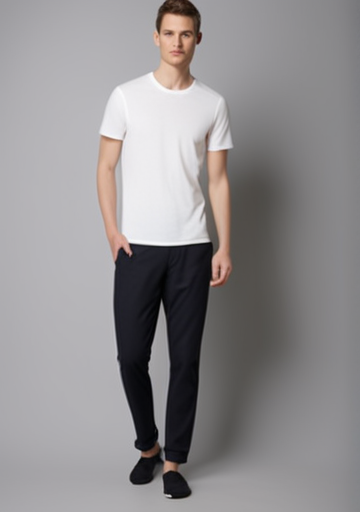

In [6]:
unet_images = unet_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_images[0]

  8%|▊         | 3/40 [00:00<00:04,  7.77it/s]

100%|██████████| 10/10 [00:00<00:00, 20.03it/s]


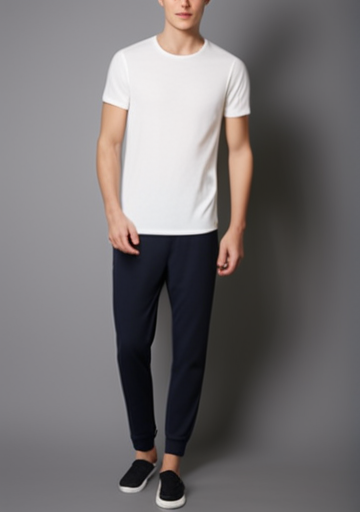

In [7]:
unet_text_enc_images = unet_text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_text_enc_images[0]

  2%|▎         | 1/40 [00:00<00:06,  5.72it/s]

100%|██████████| 10/10 [00:00<00:00, 17.37it/s]


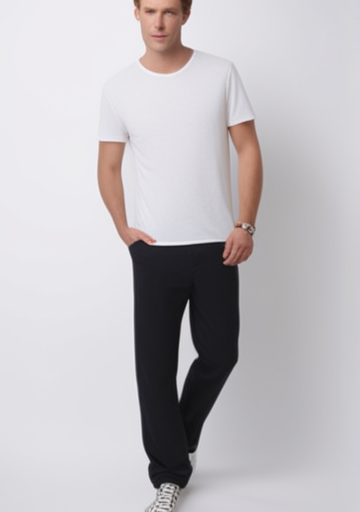

In [8]:
text_enc_images = text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
text_enc_images[0]

# Sample 2

In [9]:
prompt = "Her tank shirt has sleeves cut off, chiffon fabric and solid color patterns. There is a hat in her head. There is an accessory on her wrist."
seed = 1
best_of_n = 1
guidance_scale = 5

  5%|▌         | 2/40 [00:00<00:04,  7.77it/s]

100%|██████████| 10/10 [00:00<00:00, 20.36it/s]


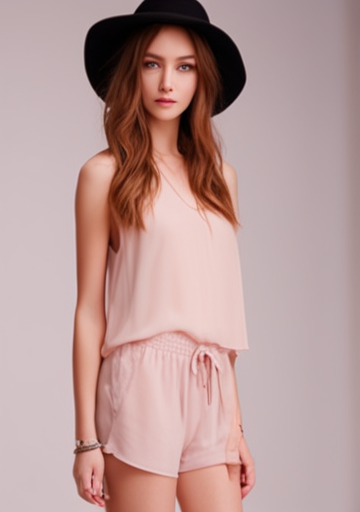

In [10]:
unet_images = unet_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_images[0]

  8%|▊         | 3/40 [00:00<00:04,  7.87it/s]

100%|██████████| 10/10 [00:00<00:00, 20.15it/s]


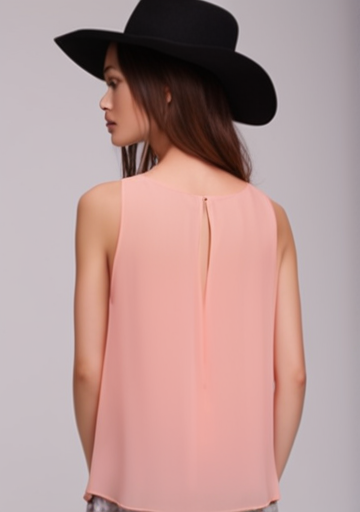

In [11]:
unet_text_enc_images = unet_text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_text_enc_images[0]

 10%|█         | 4/40 [00:00<00:02, 13.83it/s]

100%|██████████| 10/10 [00:00<00:00, 19.67it/s]


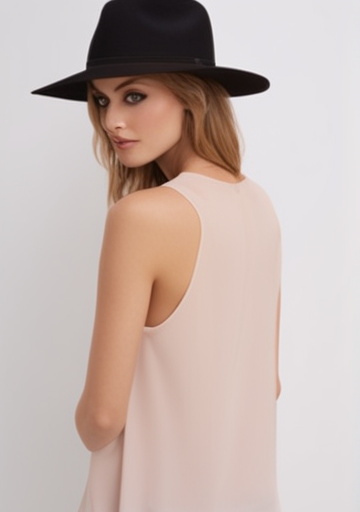

In [12]:
text_enc_images = text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
text_enc_images[0]

# Sample 3

In [13]:
prompt = "The shirt this woman wears has long sleeves, its fabric is cotton, and it has solid color patterns."
seed = 10
best_of_n = 1
guidance_scale = 5

  8%|▊         | 3/40 [00:00<00:04,  7.93it/s]

100%|██████████| 10/10 [00:00<00:00, 20.07it/s]


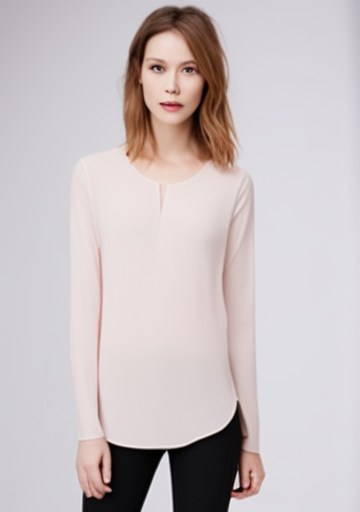

In [14]:
unet_images = unet_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_images[0]

 10%|█         | 4/40 [00:00<00:04,  7.94it/s]

100%|██████████| 10/10 [00:00<00:00, 20.25it/s]


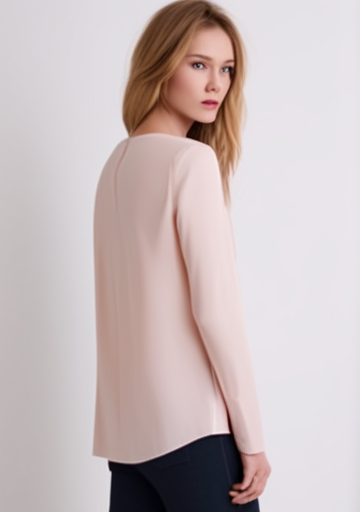

In [15]:
unet_text_enc_images = unet_text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
unet_text_enc_images[0]

 25%|██▌       | 10/40 [00:00<00:02, 13.48it/s]

100%|██████████| 10/10 [00:00<00:00, 19.59it/s]


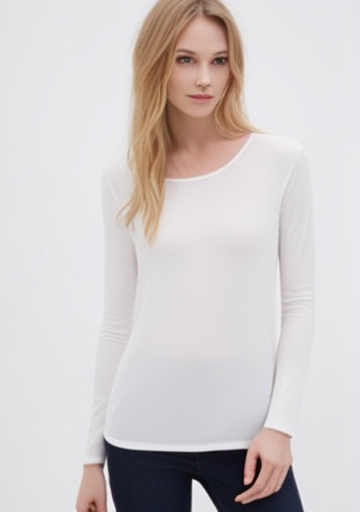

In [16]:
text_enc_images = text_enc_generator(prompt, best_of_n, seed, refine_frac=0.2, height=512, width=360, guidance_scale=guidance_scale)
text_enc_images[0]